Hello World!
[2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 17209982, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 5770484, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 3585349] 
 651


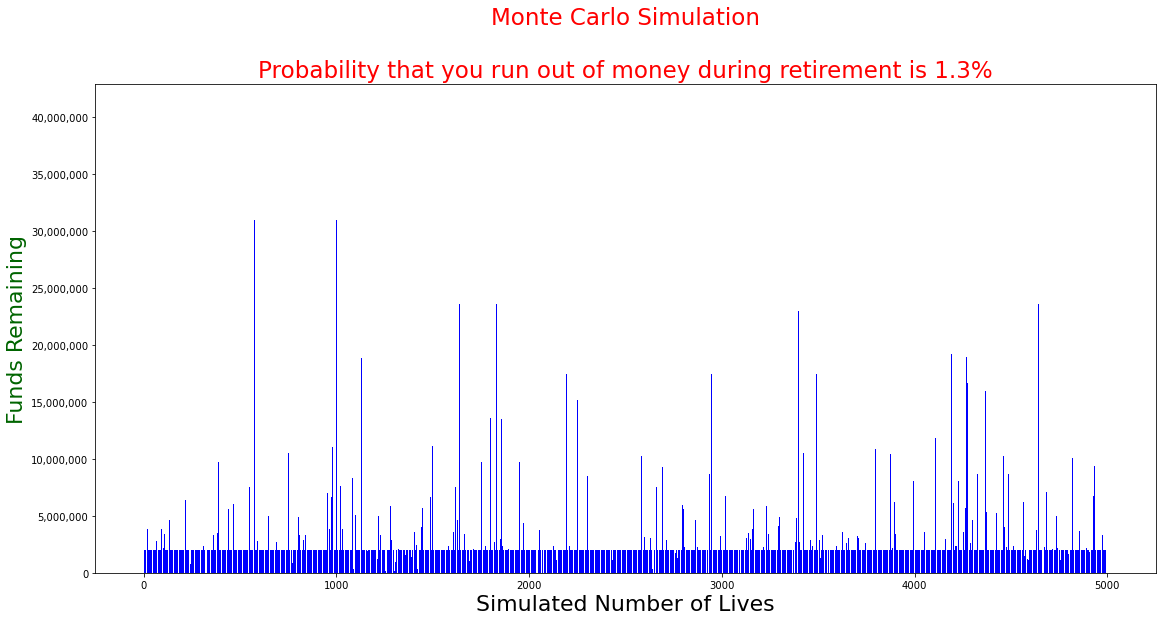

[922487, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 195492, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 1047703, 2020974.0259740262, 1896102, 2020974.0259740262, 2020974.0259740262, 1026814] 
 1345


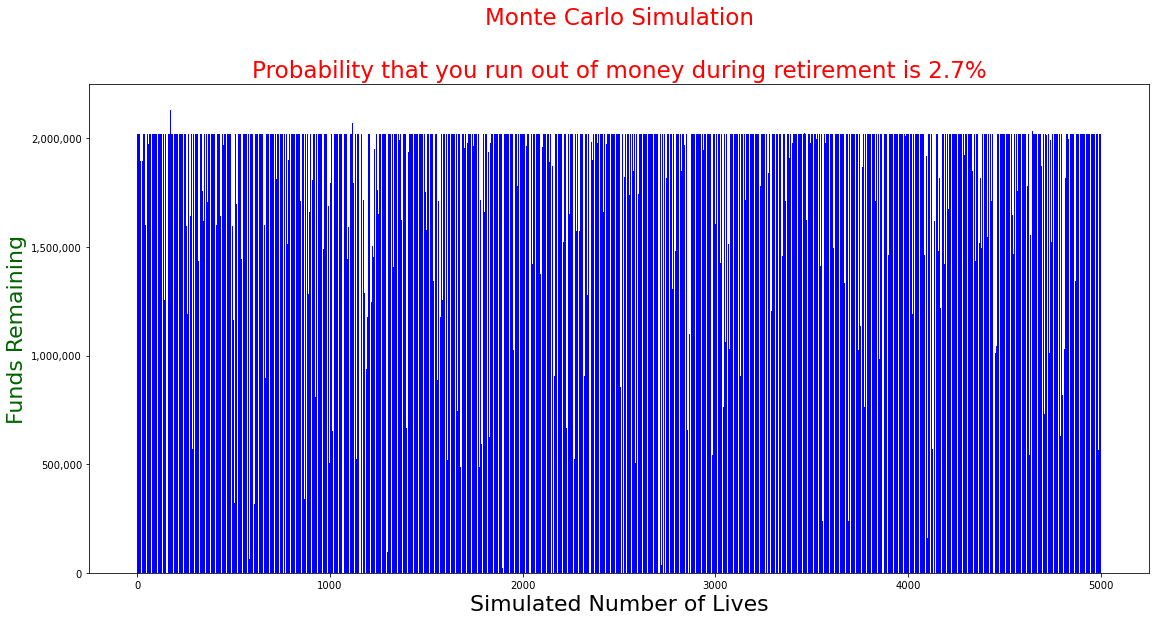

[2020974.0259740262, 1158518, 2020974.0259740262, 4173356, 1003245, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2192444, 2020974.0259740262, 2337467, 2020974.0259740262, 4179118, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 3682725, 2020974.0259740262] 
 0


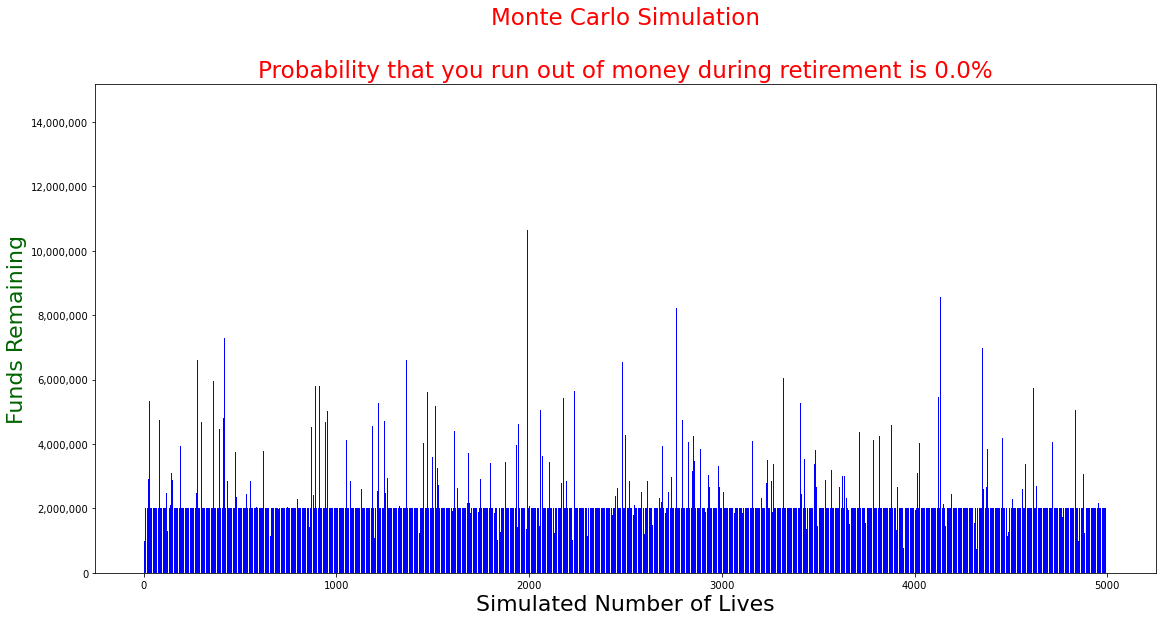

[3675575, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2381715, 2020974.0259740262, 2423409, 2020974.0259740262, 2020974.0259740262, 2553085, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 1852280, 3686154, 2020974.0259740262] 
 1


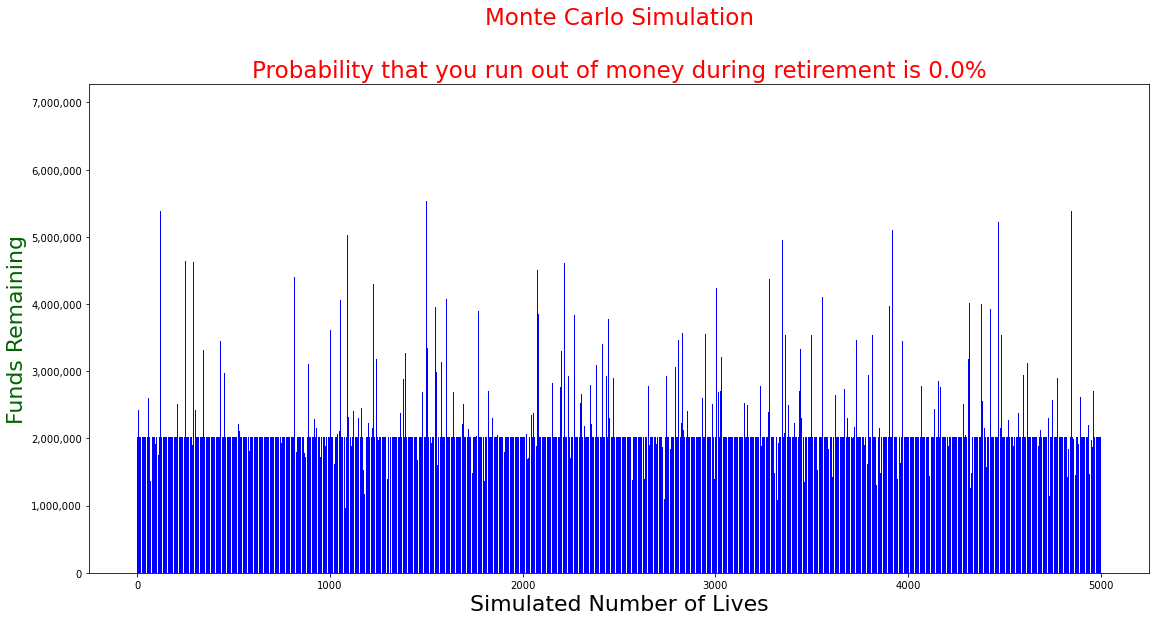

[2020974.0259740262, 2020974.0259740262, 1794531, 2020974.0259740262, 2020974.0259740262, 2807424, 2020974.0259740262, 2020974.0259740262, 1598574, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 1695089, 1834684, 2020974.0259740262, 2020974.0259740262, 2020974.0259740262, 2115880] 
 24


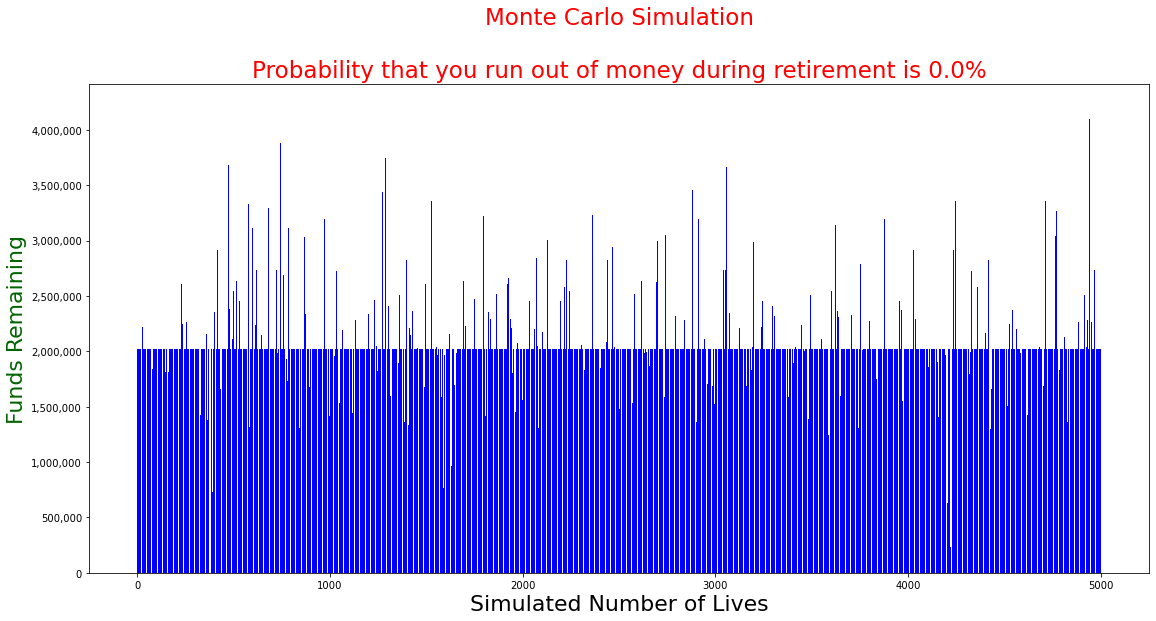

In [5]:
import os
import requests
import random
import pandas as pd
from dotenv import load_dotenv
import json
import tkinter as tk
from tkinter import *
import tkinter.font as font
from tkinter import ttk
import plotly.express as px
import matplotlib.pyplot as plt
#%matplotlib inline

''' Open a data file in percent format and convert to decimal & return a list. '''
# define a function called read_list() to load a data file and process its contents
def read_list(file_name):
    # Open the file using with, which will automatically close it
    with open(file_name) as file:
        # build a list of the contents
        line_var = [float(line.strip()) for line in file]
        # convert the list items from percent to decimal values
        decimal_var = [round(line / 100, 5) for line in line_var]
        # return the decimal list
        return decimal_var
    
''' Setup default values in input string '''
# define a function called def_input() to get the user input
def def_input(prompt, default=None):
    # prompt & default will be specified when the function is called. Display default value in brackets
    prompt = '{} [{}]: '.format(prompt, default)
    # assigns a response variable to the user input
    response = input(prompt)
    # If nothing entered and a default value exists, the default value is returned; otherwise, the user response is returned
    if not response and default:
        return default
    else:
        return response

# These txt files are solely for testing purposes we will need to read
# from a CSV file using pd for the final product

''' load data files with original data in percent form. '''
# use the read_list() function to load the six data files
try:
    bonds = read_list('./Resources/10yr_TBond_1928-2021_pct.txt')
    stocks = read_list('./Resources/SP500_returns_1928-2021_pct.txt')
    blend_40_50_10 = read_list('./Resources/SBC_blend_1928-2021_pct.txt')
    blend_50_50 = read_list('./Resources/SB_blend_1928-2021_pct.txt')
    ratio_60_40 = read_list('./Resources/60_40_ratio_1928-2021.txt')
    infl_rate = read_list('./Resources/annual_infl_rate_1928-2021_pct.txt')
    print("Hello World!")
# error handling exception
except IOError as e:
    print("{}. \nTerminating program.".format(e), file=sys.stderr)
    sys.exit(1)
    
# get user input with dictionary for investment types
investment_type = {'bonds': bonds, 'stocks': stocks, '60/40': ratio_60_40,
                        'sb': blend_50_50, 'sbc': blend_40_50_10}


invest_type = " "


''' Run MCS and return investment value at end-of-plan and bankrupt count.'''
# define the montecarlo() function takes returns list as an argument
def montecarlo(returns):
    # start a counter to keep track of which case is being run
    case_count = 0
    # start a counter for the number of cases that run out of money early
    bankrupt_count = 0
    # creates empty list to hold the outcomes of each run
    outcome = []

    start_value = slider.get()
    most_likely_years = int(slider3.get())
    withdrawal = slider2.get()

    num_cases=50000
    # while loop that runs through the cases
    while case_count < int(num_cases):
        # Assigns a new variable to the starting investment value that the user specified
        # converts string values to integers since user input was loaded as strings
        investments = start_value
        # assigns a start_year variable and selects a random value from the range of available years
        start_year = random.randrange(0, len(returns))
        # use triangular() method to draw from a triangular distribution defined by the user’s min_years,
        duration = int(random.triangular(5, 40, most_likely_years))
        # most_likely_years, and max_years inputs and returns a random floating-point number 
        end_year = start_year + duration
        lifespan = [i for i in range(start_year, duration)]

        # assigns bankrupt variable to 'no'.
        bankrupt = 'no'

        # build temporary lists for each case to store the returns and inflation data for the chosen lifespan
        lifespan_returns = []
        lifespan_infl = []
        # population lists using lifespan as the index for the returns and inflation lists. 
        for i in lifespan:
            # If the lifespan index is out of range the modulo (%) operator will wrap the indexes
            lifespan_returns.append(returns[i % len(returns)])
            lifespan_infl.append(infl_rate[i % len(infl_rate)])
            
        # loop through each year of retirement for each sim run
        # for loop that will run through all the years in a case
        # uses the index that enumerate() creates to get the yrs average inflation value from the inflation list
        for index, i in enumerate(lifespan_returns):
            infl = lifespan_infl[index]

            # do not adjust for inflation the first year
            # this conditional statement starts applying inflation after the first year
            if index == 0:
                withdraw_infl_adj = int(withdrawal)
            else:
                withdraw_infl_adj = int(withdraw_infl_adj * (1+infl))
            # Subtract the inflation adjusted withdrawal value from investments variable
            # then adjust investments for the years returns
            investments -= withdraw_infl_adj
            investments = int(investments * (1 + i))
            # Checks value of investments is greater than 0. If it’s not, sets bankrupt variable to 'yes' and ends loop
            if investments <= 0:
                bankrupt = 'yes'
                break
        
        if bankrupt == 'yes':
            # append 0 to the outcome list
            outcome.append(0)
            bankrupt_count += 1
        else:
            # otherwise continue to loop until retirement is reached and append remaining value of investments to outcome
            outcome.append(investments)
        # advance case count by 1 before starting next lifetime sim run   
        case_count += 1
    #  End function by returning the outcome and bankrupt_count variables
    return outcome, bankrupt_count


""" Calculate and determine the chance of running out of money along with other stats. """
# define bankrupt_prob() function that takes the outcome list and bankrupt_count variable returned from the montecarlo()
# function as arguments
def bankrupt_prob(outcome, bankrupt_count):
    # Assigns the length of the outcome list to the total variable
    total = len(outcome)
    # calculates the probability of running out of money as a percentage rounded one decimal place by dividing the
    # number of bankrupt cases by the total number of cases
    odds = round(100 * bankrupt_count / total, 1)
   
    return odds

def STOCKS():
    global invest_type
    invest_type = "stocks"
    
def BONDS():
    global invest_type
    invest_type = "bonds"
    
def sixtyforty():
    global invest_type
    invest_type = "60/40"
    
def halfnhalf():
    global invest_type
    invest_type = "sb"

def triblend():
    global invest_type
    invest_type = "sbc"
  

"""Call MCS & bankrupt functions, plot bar chart of MCS sim results. Generate matplotlib bar chart plot first 5000 runs""" 
# define main() function, which requires no arguments
def main():
    # call the montecarlo() function to get the outcome list and the bankrupt_count() function
    global invest_type, investment_type

    outcome, bankrupt_count = montecarlo(investment_type[invest_type])
    print(outcome[:20], "\n", bankrupt_count)
    
    #bankrupt_count, outcome = montecarlo(investment_type)
    
    # get the odds of running out of money
    odds = bankrupt_prob(outcome, bankrupt_count)
    # assigns new variable, plotdata, to the first 5,000 items in the outcome list
    plotdata = outcome[:5000]
    # uses matplotlib to create and display the bar chart.
    plt.figure('This retirement simulation was provided to you by, Hunter, Thomas, Jeff and Ray (showing first {} MCS runs)'.format(len(plotdata)),figsize=(19, 9))
    # use list comprehension to build indexes, starting with 1 for year one, based on the length of the plotdata list
    index = [i + 1 for i in range(len(plotdata))]
    # uses bar chart
    plt.bar(index, plotdata, color='blue')
    # x-axis represents the number of lives
    plt.xlabel('Simulated Number of Lives', fontsize=22)
    # y-axis represents the money remaining at the end of each simulated life
    plt.ylabel('Funds Remaining',color='darkgreen', fontsize=22)
 
    # use scientific notation when it annotates the y-axis
    plt.ticklabel_format(style='scientific', axis='y')
    # get the y-axis and use set_major_formatter() and Func_Formatter() methods and uses lambda function to apply 
    # pyhton's string-formatting technique for comma separators
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}"
                                                         .format(int(x))))
    # displays the plot title and the odds variable with a large font size in eye-catching red
    plt.title('Monte Carlo Simulation\n\nProbability that you run out of money during retirement is {}%'.format(odds),fontsize=23, color='red')
    # draw the plot to the screen
    plt.show()
    
    #print(start_value)
    #print(withdrawal)
    #print(duration)

# run the simulation program
#if __name__ == '__main__':
 #   main()

#setting size and measuring size of screen
window_width = 800
window_height = 600
root = tk.Tk()
root.title('                                                                       Retirement Simulator Widget                                                (PHX MAFIA INC.)' )
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# find the center point
center_x = int(screen_width/2 - window_width / 2)
center_y = int(screen_height/2 - window_height / 2)

# set the position of the window to the center of the screen
root.geometry(f'{window_width}x{window_height}+{center_x}+{center_y}')



root.columnconfigure(1, weight=1)
root.columnconfigure(1, weight=8)




def slider_changed(event):
    value_label.configure(text='{: .2f}'.format(slider.get()))

def slider_changed2(event):
    value_label2.configure(text='{: .2f}'.format(slider2.get()))

def slider_changed3(event):
    value_label3.configure(text='{: .2f}'.format(slider3.get()))

# label for the slider
slider_label = ttk.Label(root,text='What is your approximate investment balance? ')
slider_label.grid(column=0,row=0,sticky='w')

# label for 2nd slider
slider_label2 = ttk.Label(root, text='How much is your average spending per year? ')
slider_label2.grid(column=0, row=3, sticky='w')

# label for 3rd slider 
slider_label3 = ttk.Label(root, text='How many years do you want your savings to last? ')
slider_label3.grid(column=0, row=6, sticky='w')

#  slider
slider = ttk.Scale(root,from_=10000, to=10000000,orient='horizontal', command = slider_changed)
slider.grid(column=1,row=0,sticky='we')

#slider 2
slider2 = ttk.Scale(root,from_=1000, to=300000,orient='horizontal',command=slider_changed2)
slider2.grid(column=1,row=3,sticky='we')

# slider 3
slider3 = ttk.Scale(root,from_=5, to=60,orient='horizontal',command=slider_changed3)
slider3.grid(column=1,row=6,sticky='we')

# current value label
current_value_label = ttk.Label(root,text='Current Value:')
current_value_label.grid(row=1,columnspan=2,sticky='n',ipadx=10,ipady=10)

# current value label 2
current_value_label2 = ttk.Label(root,text='Current Value:')
current_value_label2.grid(row=4,columnspan=2,sticky='n',ipadx=10,ipady=10)

#current value label 3 
current_value_label3 = ttk.Label(root,text='Current Value:')
current_value_label3.grid(row=7,columnspan=2,sticky='n',ipadx=10,ipady=10)
# value label
value_label = ttk.Label(root, text='{: .2f}'.format(slider.get()))
value_label.grid(row=2, columnspan=2, sticky='n')

#value label 2 
value_label2 = ttk.Label(root, text='{: .2f}'.format(slider2.get()))
value_label2.grid(row=5, columnspan=2, sticky='n')

#value label 3 
value_label3 = ttk.Label(root, text='{: .2f}'.format(slider3.get()))
value_label3.grid(row=8, columnspan=2, sticky='n')

# button for what your porfolio is comprised of 

button_label = tk.Label(root, text='Choose your portfolio makeup.')
button_label.grid_configure(column=0, row=9, padx = 5, pady = 5)

frame = tk.Frame(root)
frame.place(relx=.15, rely=.5 , relwidth =.9, relheight = .8)


stocks = tk.Button(frame, text='STOCKS', command = lambda: STOCKS())
stocks.grid(column=0 , row=1 )

bonds = tk.Button(frame, text='BONDS', command = lambda: BONDS())
bonds.grid(column=1 , row=1 )

sixfour = tk.Button(frame, text='60/40', command = lambda: sixtyforty())
sixfour.grid(column=2 , row=1)

sb = tk.Button(frame, text='50/50', command = lambda : halfnhalf())
sb.grid(column=3, row=1)

sbc = tk.Button(frame, text='STOCKS, BONDS, & CASH (50/40/10)', command = lambda: triblend())
sbc.grid(column=4 , row=1)

frame2 = tk.Frame(frame)
frame2.place(relx=.25, rely=.2, relwidth = .3, relheight = .8)

monteC = tk.Label(frame2, text='How long will your savings last?')
monteC.grid_configure(column=0, row=0)

num_cases = 50000


MC = tk.Button(frame2, text="Run Simulation!", command= lambda: main())
MC.grid_configure(column=0, row=1)




root.mainloop()





